In [32]:
import pandas as pd

In [33]:
dados = pd.read_csv('dados/dados.csv')

# Distribuição de frequência para variáveis qualitativas

## Método 1

### https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

In [34]:
dados['Sexo'].value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

### Obs: a disparidade entre os sexos se dá pois foram registrados apenas os "responsáveis" pelo domicílio

In [35]:
dados['Sexo'].value_counts(normalize = True) * 100 #O parâmetro normalize faz com que a soma de todas as contagens seja 1

0    69.299844
1    30.700156
Name: Sexo, dtype: float64

In [36]:
frequencia = dados['Sexo'].value_counts()

In [37]:
percentual = (dados['Sexo'].value_counts(normalize = True) * 100).round(2)

In [38]:
#Criamos um dataframe via dicionário para oganizar esses dois dados:
dist_freq_qualitativas = pd.DataFrame({'Frequência': frequencia, 'Porcentagem(%)': percentual})
dist_freq_qualitativas

,Frequência,Porcentagem(%)
0,53250,69.3
1,23590,30.7


In [39]:
#Ajustando os labels do DT:

In [40]:
dist_freq_qualitativas.rename_axis('Sexo', axis = 'columns', inplace = True)

In [41]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem(%)
0,53250,69.3
1,23590,30.7


In [44]:
dist_freq_qualitativas.rename(index = {0:'Masculino', 1:'Feminino'}, inplace = True)

In [45]:
dist_freq_qualitativas

Sexo,Frequência,Porcentagem(%)
Masculino,53250,69.3
Feminino,23590,30.7


## Método 2 (cruzando variáveis)

### https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.crosstab.html

In [46]:
sexo = {0: 'Masculino',
        1: 'Feminino'}

cor = {0: 'Indígena',
        2: 'Branca',
        4: 'Preta',
        6: 'Amarela',
        8: 'Parda',
        9: 'Sem declaração'}

In [57]:
frequencia = pd.crosstab(dados['Sexo'], dados['Cor'])
frequencia.rename(index = sexo, inplace = True)
frequencia.rename(columns = cor, inplace = True)
frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [58]:
percentual = pd.crosstab(dados['Sexo'], dados['Cor'], normalize = True).round(2)
percentual.rename(index = sexo, inplace = True)
percentual.rename(columns = cor, inplace = True)
percentual

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.0,0.29,0.07,0.0,0.33
Feminino,0.0,0.13,0.04,0.0,0.14


# Distribuição de frequência para variáveis quantitativas

### https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.cut.html

## Método 1: Com classes pré-estabelecidas

In [59]:
#Inicialmente precisamos estabelecer as categorias nas quais os dados serão organizados, começamos investigando o
#mínimo e o máximo da variável

In [60]:
dados['Renda'].min()

0

In [61]:
dados['Renda'].max()

200000

In [62]:
#Usaremos a classificação em classes A, B, C, D, E

In [63]:
classes = [0, 1576, 3152, 7880, 15760, 200000] #os valores da lista são os limites entre as classes

In [64]:
labels = ['E', 'D', 'C', 'B', 'A'] #na mesma sequência dos limites acima

In [73]:
frequencia = pd.value_counts(pd.cut(x = dados['Renda'],
      bins = classes,
      labels = labels,
      include_lowest = True))
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Renda, dtype: int64

In [75]:
percentual = pd.value_counts(pd.cut(x = dados['Renda'],
      bins = classes,
      labels = labels,
      include_lowest = True), normalize = True).round(2)
percentual

E    0.65
D    0.22
C    0.10
B    0.03
A    0.01
Name: Renda, dtype: float64

In [77]:
dist_freq_quantitativas_personalizadas = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual},
)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
E,49755,0.65
D,16700,0.22
C,7599,0.10
B,2178,0.03
A,608,0.01


In [81]:
dist_freq_quantitativas_personalizadas.sort_index(ascending = False, inplace = True)
dist_freq_quantitativas_personalizadas

,Frequência,Porcentagem (%)
A,608,0.01
B,2178,0.03
C,7599,0.10
D,16700,0.22
E,49755,0.65


## Método 2: Com classes com amplitude fixa

In [83]:
import numpy as np

In [89]:
n = dados.shape[0] # Número de entradas

In [92]:
# Uso a regra de Keggle para estipular um número adequado de classes dado o número de entradas
k = 1 + (10 /3) * np.log10(n)
k = int(k.round(0))
k

17

In [96]:
frequencia = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False
) 
frequencia
#Note que no parâmetro "bins" do pd.cut podemos colocar ou uma lista com os separadores das classe ou o número de classes, no segundo caso ele divide em classes de mesmo tamanho

(-200.001, 11764.706]       75594
(11764.706, 23529.412]       1022
(23529.412, 35294.118]        169
(35294.118, 47058.824]         19
(47058.824, 58823.529]         16
(58823.529, 70588.235]          5
(70588.235, 82352.941]          4
(82352.941, 94117.647]          1
(94117.647, 105882.353]         6
(105882.353, 117647.059]        0
(117647.059, 129411.765]        1
(129411.765, 141176.471]        0
(141176.471, 152941.176]        0
(152941.176, 164705.882]        0
(164705.882, 176470.588]        0
(176470.588, 188235.294]        0
(188235.294, 200000.0]          3
Name: Renda, dtype: int64

In [97]:
percentual = pd.value_counts(
    pd.cut(
        x = dados.Renda,
        bins = 17,
        include_lowest = True
    ),
    sort = False,
    normalize = True
).round(2) 
percentual

(-200.001, 11764.706]       0.98
(11764.706, 23529.412]      0.01
(23529.412, 35294.118]      0.00
(35294.118, 47058.824]      0.00
(47058.824, 58823.529]      0.00
(58823.529, 70588.235]      0.00
(70588.235, 82352.941]      0.00
(82352.941, 94117.647]      0.00
(94117.647, 105882.353]     0.00
(105882.353, 117647.059]    0.00
(117647.059, 129411.765]    0.00
(129411.765, 141176.471]    0.00
(141176.471, 152941.176]    0.00
(152941.176, 164705.882]    0.00
(164705.882, 176470.588]    0.00
(176470.588, 188235.294]    0.00
(188235.294, 200000.0]      0.00
Name: Renda, dtype: float64

In [98]:
dist_freq_quantitativas_amplitude_fixa = pd.DataFrame(
    {'Frequência': frequencia, 'Porcentagem (%)': percentual}
)
dist_freq_quantitativas_amplitude_fixa

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,0.98
"(11764.706, 23529.412]",1022,0.01
"(23529.412, 35294.118]",169,0.00
"(35294.118, 47058.824]",19,0.00
"(47058.824, 58823.529]",16,0.00
"(58823.529, 70588.235]",5,0.00
"(70588.235, 82352.941]",4,0.00
"(82352.941, 94117.647]",1,0.00
"(94117.647, 105882.353]",6,0.00
"(105882.353, 117647.059]",0,0.00


# Histogramas

## Pelo Seaborn

In [99]:
import seaborn as sns

/tmp/ipykernel_36467/148302873.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura, kde = False)


<Axes: title={'center': 'Distribuição de Frequências - Altura'}, xlabel='Metros'>

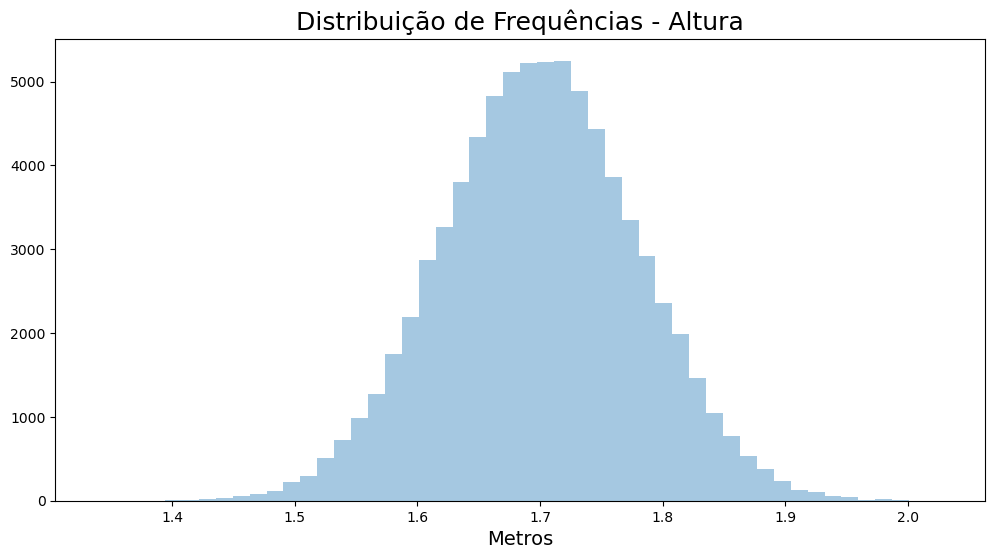

In [103]:
ax = sns.distplot(dados.Altura, kde = False)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

/tmp/ipykernel_36467/1133179209.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados.Altura)


<Axes: title={'center': 'Distribuição de Frequências - Altura - KDE'}, xlabel='Metros', ylabel='Density'>

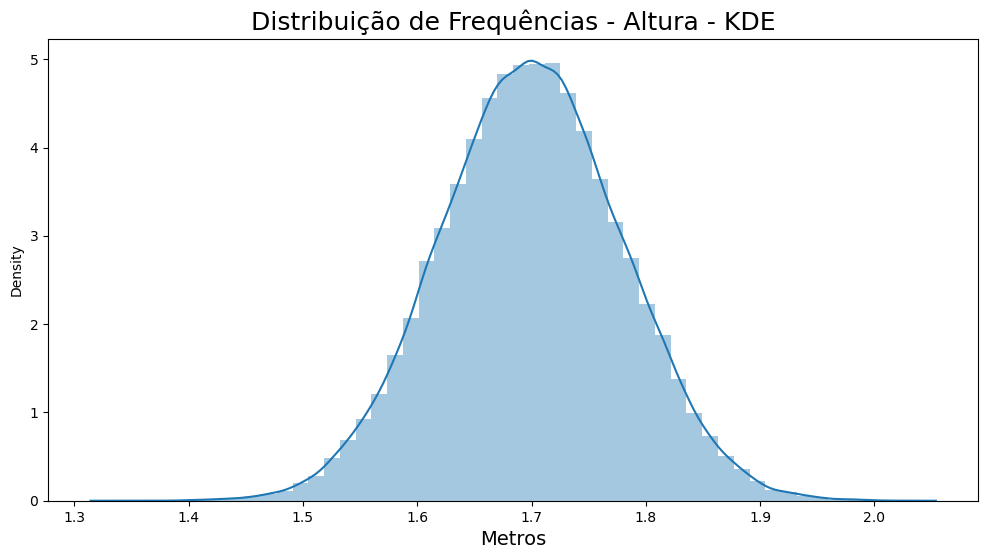

In [104]:
ax = sns.distplot(dados.Altura)

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências - Altura - KDE', fontsize=18)
ax.set_xlabel('Metros', fontsize=14)
ax

## Pelo Pandas

<Axes: >

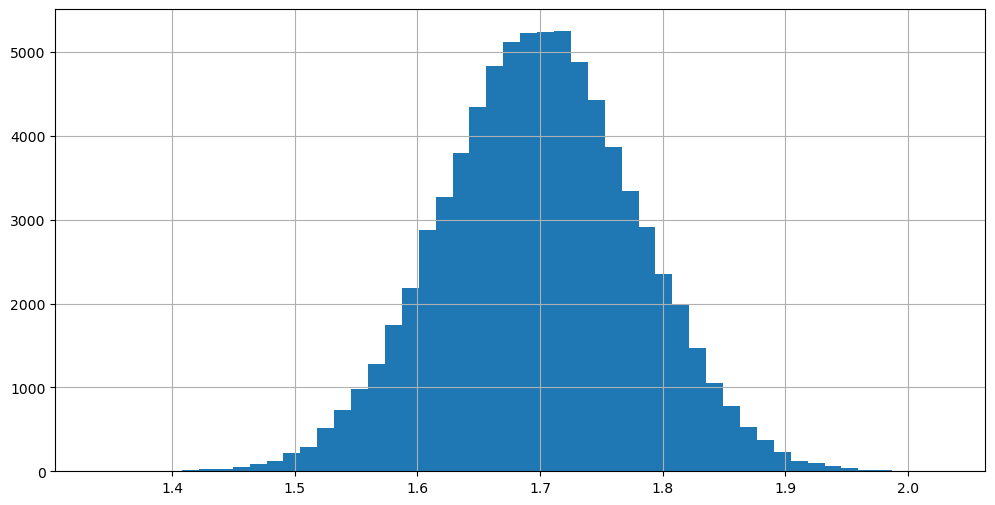

In [105]:
dados.Altura.hist(bins = 50, figsize=(12,6)) #bins informa a quantidade de barras

<Axes: >

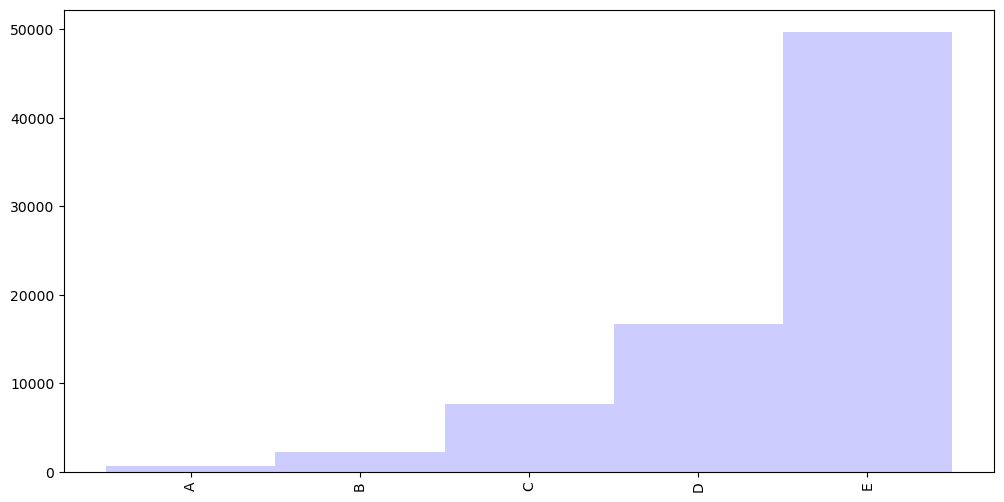

In [106]:
dist_freq_quantitativas_personalizadas['Frequência'].plot.bar(width= 1, color= 'blue', alpha = 0.2, figsize= (12, 6))